# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [36]:
import pandas as pd
data = pd.read_csv("Quakes.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [37]:
# Checking the shape of the data (dimensions)
data.shape

# 1000 rows and 5 columns

(1000, 5)

In [38]:
data.head()

,lat,long,depth,mag,stations
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11


# Answer to Question 2 :

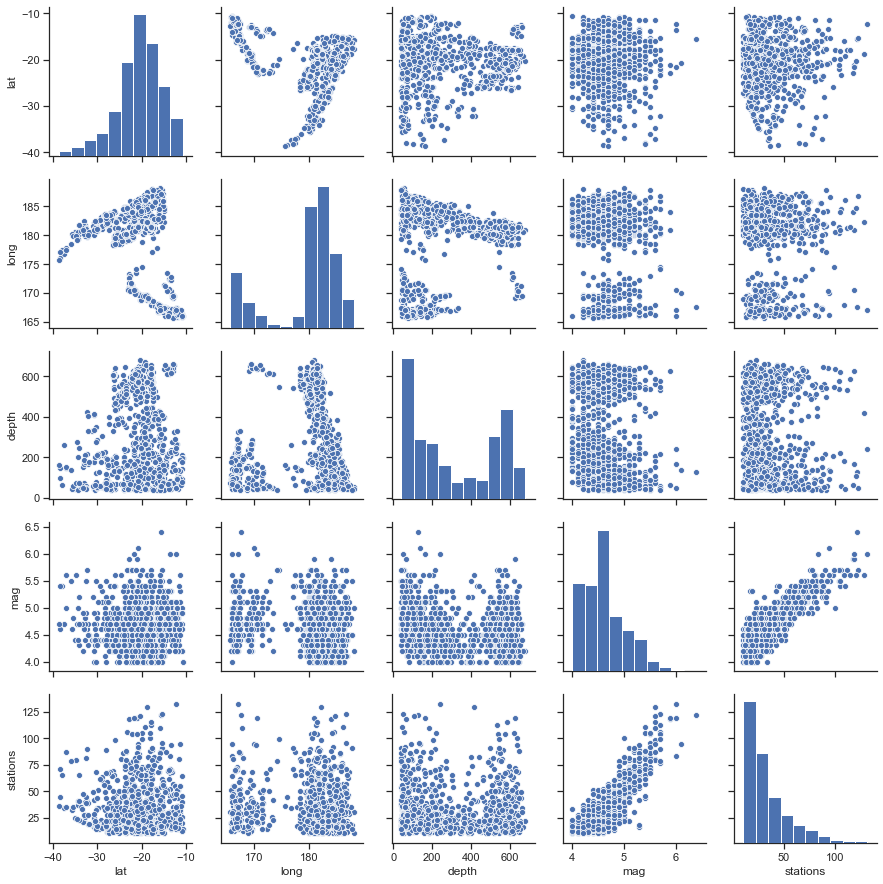

In [40]:
# Scatter plot matrix
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data)

# Answer to Question 3:

In [39]:
data.describe()

,lat,long,depth,mag,stations
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-20.642750,179.462020,311.371000,4.620400,33.418000
std,5.028791,6.069497,215.535498,0.402773,21.900386
min,-38.590000,165.670000,40.000000,4.000000,10.000000
25%,-23.470000,179.620000,99.000000,4.300000,18.000000
50%,-20.300000,181.410000,247.000000,4.600000,27.000000
75%,-17.637500,183.200000,543.000000,4.900000,42.000000
max,-10.720000,188.130000,680.000000,6.400000,132.000000


In [5]:
# Observations :
# The mean depth is 311 greater than the median of 247 indicating right skewness
# The mean magnitude is 4.62 almost the same as the median of 4.60
# The maximum number of stations reporting is 132

In [41]:
data.dtypes
# Here : all the variables are either integer or float

lat         float64
long        float64
depth         int64
mag         float64
stations      int64
dtype: object

# Answer to Question 4: 

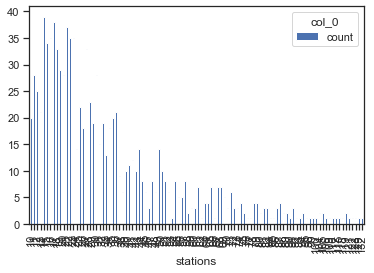

In [42]:
my_tab = pd.crosstab(index = data["stations"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

# The distribution shows the count data

In [44]:
# Frequency distribution table
my_tab = pd.crosstab(index=data["stations"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
stations,
10,20
11,28
12,25
13,21
14,39
...,...
121,1
122,1
123,1


# Answer to Question 5 : 

In [49]:
data.isnull().sum().sum()

# This shows the dataset does not have any NA's or nulls

0

In [57]:
lat_nan_rows = data[data['lat'].isnull()]
long_nan_rows=data[data['long'].isnull()]

# Checking separately for lat and long columns
lat_nan_rows.sum().sum()

0.0

In [58]:
long_nan_rows.sum().sum()

0.0

# Answer to Question 6 : 

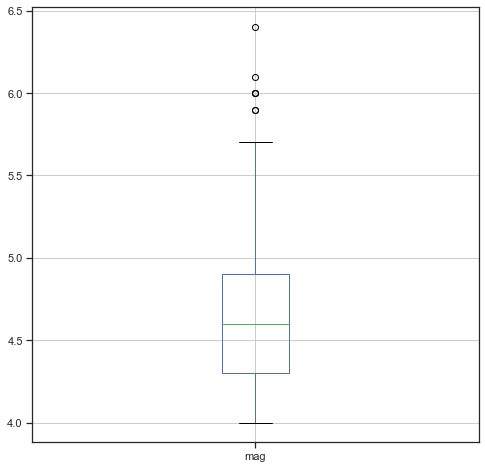

In [59]:
data.boxplot(column="mag",        # Column to split upon
                 figsize= (8,8))        # Figure size

In [ ]:
# Observation:
# The right tail is longer than the left one
# There are few potential outliers seen in the plot

# Answer to Question 7: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E22EA14E88>]],
      dtype=object)

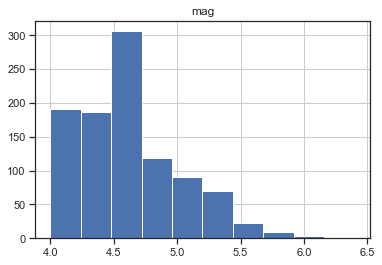

In [61]:
data.hist(column='mag')

# Observations :
# Clear bellcurve with longer right tail

# Answer to Question :8

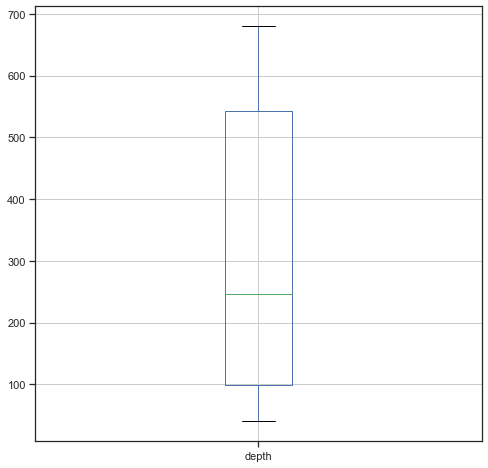

In [62]:
data.boxplot(column="depth",        # Column to split upon
                 figsize= (8,8))        # Figure size

In [ ]:
# Observation:
# Clearly right skewed with mean > median 
# Also : we do not see any outliers
# Large IQR (Inter Quartile Range) observed from the plot

# Answer to Question : 9

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E22F341D48>]],
      dtype=object)

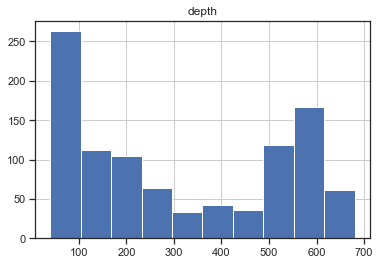

In [63]:
data.hist(column='depth')

# Observations :
# Clear bellcurve with longer right tail

In [ ]:
# Large IQR due to two different depth curves observed (400 is like the middle value splitting the two curves)

# Answer to Question 10:

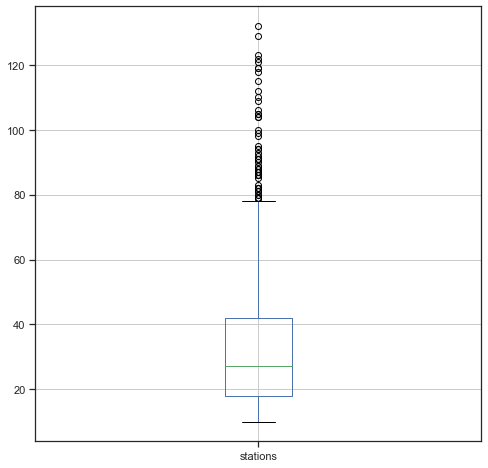

In [64]:
data.boxplot(column="stations",        # Column to split upon
                 figsize= (8,8))        # Figure size

In [ ]:
# Observation:
# Clearly right skewed with mean > median 
# Also : we see a very large number of  outliers

# Answer to Question 11 :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E22F43CD08>]],
      dtype=object)

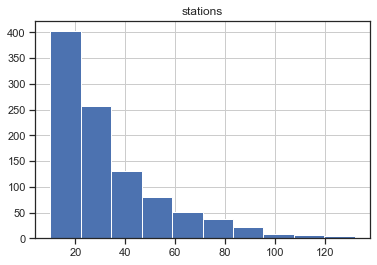

In [65]:
data.hist(column='stations')

# Observations :
# Most of the earthquakes are reported under 50 stations
# Also : on the right , we observe a very long tail of higher counts (indicating outliers)

# Answer to Question 12 : 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


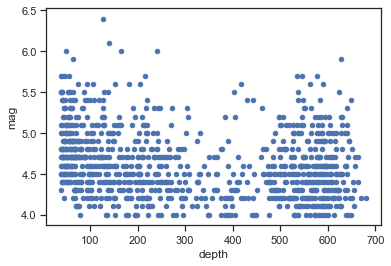

In [66]:
data.plot(kind='scatter', x='depth', y='mag')

In [ ]:
# observation:
# No clear distinction / observation can be made as we see from the plot

# Answer to Question 13 :

In [67]:
#splitting the dataset to 2 depth curves as we saw above based on depth taken index as 400 :
highdepth_quakesdata = data[data['depth'] > 400] 
lowdepth_quakesdata = data[data['depth'] <=400] 

# Answer to Question 14:

In [71]:
highdepth_quakesdata.corr().loc['depth','mag']

0.0017459475324797784

In [ ]:
# Correlation is weak showing (0.0017) : 0.17% between depth and magnitude for high depth quakes

# Answer to Question 15:

In [72]:
lowdepth_quakesdata.corr().loc['depth','mag']

-0.3296122482657966

In [ ]:
# Correlation is weak showing (-0.3296) :  -33% between depth and magnitude for low depth quakes

# Answer to Question 16:

In [ ]:
# For low depth quakes : correlation between depth and magnitude is lower than that of high depth quakes
# But it isn;t that significant enough

# Answer to Question 17:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


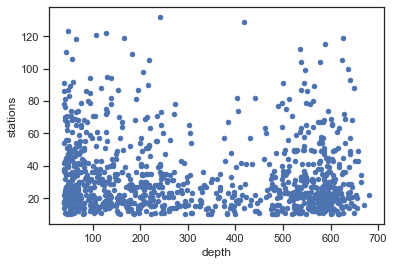

In [73]:
data.plot(kind='scatter', x='depth', y='stations')

In [ ]:
# No clear distinction / observation can be made as we see from the plot

# Answer to Question : 18

In [74]:
highdepth_quakesdata.corr().loc['depth','stations']
# Correlation is weak showing (-0.005) : -0.5% between depth and stations reported for high depth quakes

-0.005546235895539454

# Answer to Question : 19

In [75]:
lowdepth_quakesdata.corr().loc['depth','stations']
# Correlation is weak showing (-0.17) : -17 % between depth and stations reported for low depth quakes

-0.1712382479288505

# Answer to Question : 20

In [ ]:
# Compared to low depth quakes, high depth quakes have a higher correlation between depth and stations but not very significant in value

# Answer to Question : 21

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


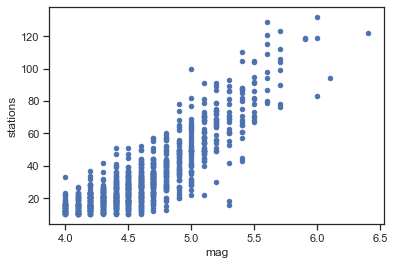

In [76]:
data.plot(kind='scatter', x='mag', y='stations')

In [ ]:
# From the plot : we clearly observe magnitude appears to positively affect station reporting

# Answer to Question : 22

In [77]:
highdepth_quakesdata.corr().loc['mag','stations']
# Correlation is strong showing (0.874) : ~87% between magnitude and stations reported for high depth quakes

0.874345406089143

# Answer to Question : 23

In [78]:
lowdepth_quakesdata.corr().loc['mag','stations']
# Correlation is strong showing (0.847) : ~85% between magnitude and stations reported for low depth quakes

0.8470885599156606

# Answer to Question : 24

In [ ]:
# Compared to low depth quakes, high depth quakes have a higher correlation between magnitude and stations 

# Answer to Question : 25

In [79]:
data.corr().loc['mag','stations']

0.8511824223723684

In [ ]:
# overall : 85% correlation between magnitude and stations reported variabels from the given dataset

# Insights : This indicates : Overall there's a 85% corrrelation b/w magnitude and stations reported
# Also : we see high depth quakes are more reported by stations by 87% comapred to the lower  depth quakes (84.7%)


# Answer to Question : 26

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


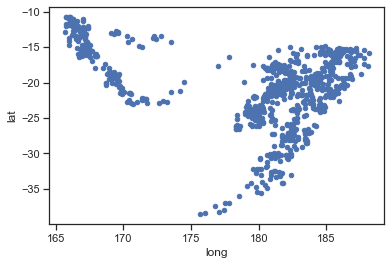

In [82]:
data.plot(kind='scatter', x='long', y='lat')

In [ ]:
# Higher number of quakes are more typically east of mainland